# Pixel based operations

0. negation: 
    
    $I = 255 - I$ 

0. color channel split and merge

0. tone mapping = color resolution reduction

0. binarization

0. bit planes (for gray scale images)

0. gamma correction = intensity mapping

0. Histogram Operation
    0. gamma correction
    0. histogram equalization
    

## Negation 

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import timeit
import cv2 as cv
print ('opencv version = ', cv.__version__)

opencv version =  3.3.1


@ this is a color image of dimension (749, 915, 3) with data type uint8
(915, 749)


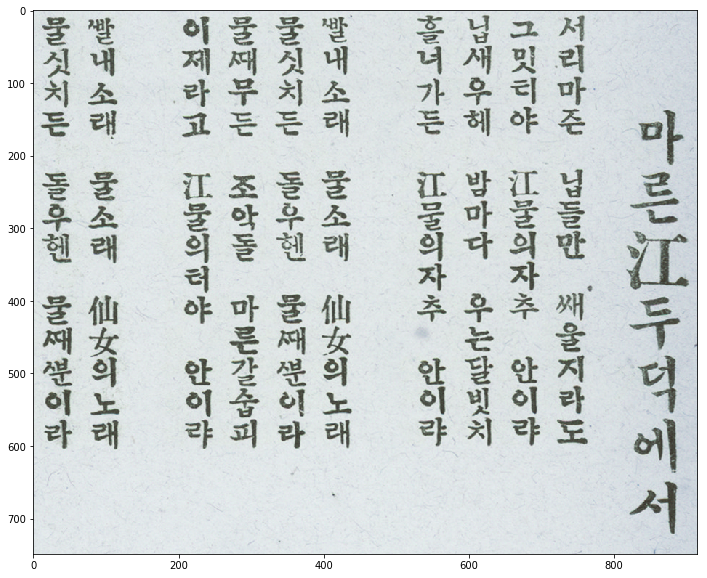

In [7]:
targetfilename = '020-021-cropped-2.png'
tgimg = cv.imread (targetfilename)
print ('@ this is a color image of dimension {} with data type {}'.format(tgimg.shape, tgimg.dtype))
size = tgimg.shape[::-1][1:3]
print (size)
dispSize = (size[0]*10/size[1], 10)
plt.figure (figsize=dispSize)
plt.imshow (tgimg)

In [114]:
import timeit
class elapsedTime :
    def __init__ (self):
        self.start = 0;
        self.elapsed = 0;
    def reset (self):
        self.start = timeit.default_timer ();
    def stop (self):
        self.elapsed = timeit.default_timer () - self.start;
    def print (self):
        print ('@ elapsed Time = ', self.elapsed)

In [17]:
negImage = tgimg.copy()
start_time = timeit.default_timer()
# Negation 
for r in range(negImage.shape[0]):
    for c in range(negImage.shape[1]):
        for ch in range(negImage.shape[2]):
            negImage[r,c,ch] = 255 - negImage[r,c,ch]
#
elapsed = timeit.default_timer() - start_time
print ('time elapsed = ', elapsed)

time elapsed =  3.155657657503904


In [24]:
# pixel access with image.item(), and image.itemset()

negImage = tgimg.copy()
start_time = timeit.default_timer()
for r in range(negImage.shape[0]):
    for c in range(negImage.shape[1]):
        for ch in range(negImage.shape[2]):
            negImage.itemset( (r,c,ch), 255 - negImage.item(r,c,ch) )
#            
elapsed = timeit.default_timer() - start_time
print ('time elapsed = ', elapsed)

time elapsed =  0.8538109233914497


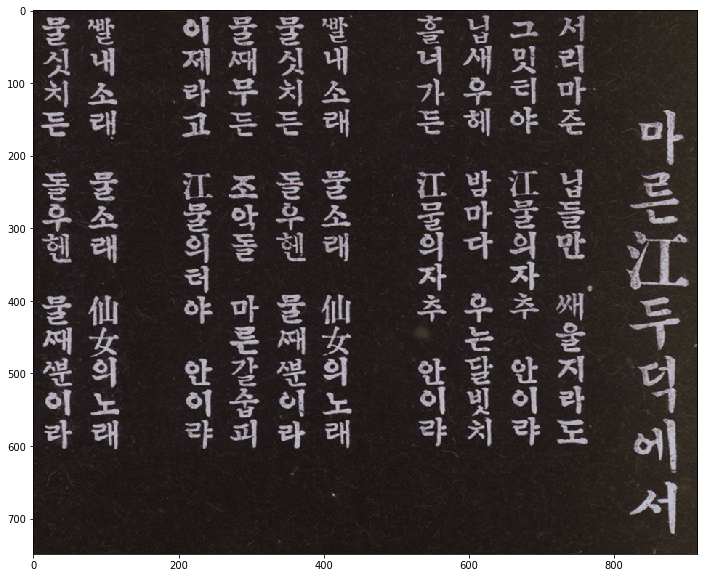

In [12]:
plt.figure (figsize=dispSize)
plt.imshow (negImage)

In [112]:
def negateImage (srcImage):
    # pixel access with image.item(), and image.itemset()
    etime = elapsedTime ()
    negImage = srcImage.copy()
    etime.reset()
    for r in range(negImage.shape[0]):
        for c in range(negImage.shape[1]):
            for ch in range(negImage.shape[2]):
                negImage.itemset( (r,c,ch), 255 - negImage.item(r,c,ch) )
    #            
    etime.stop()
    etime.print ()
    return negImage

## Split and Merge

In [55]:
srcImage = cv.imread ('nice-Image.png')

b,g,r = cv.split (srcImage)

rgbImage = cv.merge ((r,g,b))
gbrImage = cv.merge ((g,b,r))

(<matplotlib.axes._subplots.AxesSubplot at 0x197f4aea5f8>,
 <matplotlib.image.AxesImage at 0x197f4b15048>)

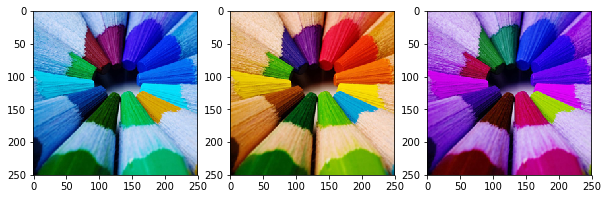

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow (srcImage)
plt.subplot (132), plt.imshow (rgbImage)
plt.subplot (133), plt.imshow (gbrImage)

They will look all very similar.


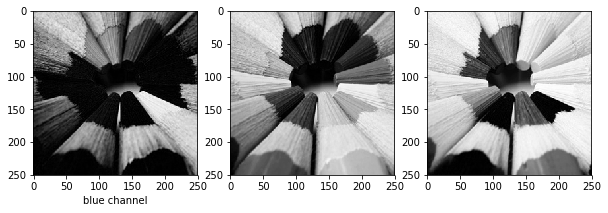

In [60]:
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow (b, cmap='gray'), plt.xlabel('blue channel')
plt.subplot(132), plt.imshow (g, cmap='gray')
plt.subplot(133), plt.imshow (r, cmap='gray')
print ('They will look all very similar.')

In [57]:
grayImage = cv.cvtColor (srcImage, cv.COLOR_BGR2GRAY)

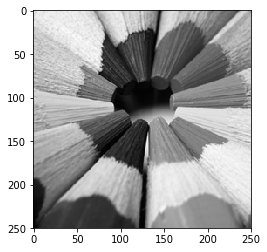

In [58]:
plt.imshow (grayImage, cmap='gray')

## Color Tone Mapping

- image pixel level is changed from 256 level ([0,255])  to  64 level ([0,63]), then it is simply scaled back to [0, 255].

    $I = (I/64)*64 + 32$
    
- in this case, the number of distinct pixels is 64


### Direct Pixel Access and calculation

In [100]:
step = 64
dstImage = np.zeros (srcImage.shape, dtype=np.uint8)
for r in range(srcImage.shape[0]):
    for c in range(srcImage.shape[1]):
        for ch in range(srcImage.shape[2]):
            dstImage[r,c,ch] = int (int(rgbImage[r,c,ch]/step) * step + step/2-1)
#
print (dstImage[10, 10], int(int(255/step)*step + step/2-1))

[223 223 159] 223


(<matplotlib.axes._subplots.AxesSubplot at 0x197f6a1afd0>,
 <matplotlib.image.AxesImage at 0x197f680a630>)

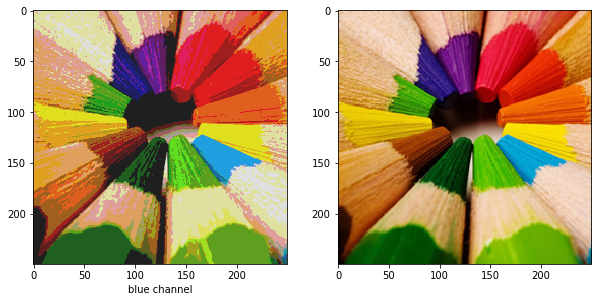

In [101]:
plt.figure(figsize=(10,10))

plt.subplot(121), plt.imshow (dstImage), plt.xlabel('blue channel')
plt.subplot(122), plt.imshow (rgbImage)

Use Table and hashing method to speed up

In [106]:
table = np.empty([256], dtype=np.uint8)
print (table.shape)
for i in range (256):
    table[i] = int ( int(i/step) * step + step/2 )

(256,)


In [109]:
dstImageByTable = rgbImage.copy()
for r in range(srcImage.shape[0]):
    for c in range(srcImage.shape[1]):
        for ch in range(srcImage.shape[2]):
            dstImageByTable[r,c,ch] = table[rgbImage[r,c,ch]]

(<matplotlib.axes._subplots.AxesSubplot at 0x197f6856630>,
 <matplotlib.image.AxesImage at 0x197f69471d0>)

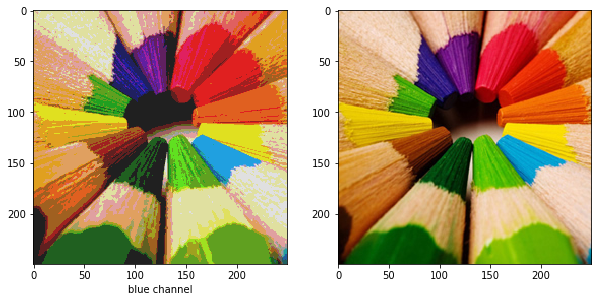

In [110]:
plt.figure(figsize=(10,10))

plt.subplot(121), plt.imshow (dstImageByTable), plt.xlabel('blue channel')
plt.subplot(122), plt.imshow (rgbImage)

In [115]:
neg = negateImage (rgbImage)

@ elapsed Time =  0.06097282378777891


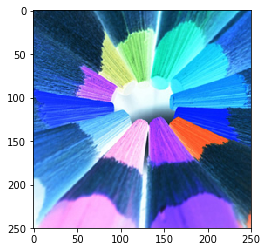

In [116]:
plt.imshow (neg)